# Feature extraction for Fake Review Dataset from Kaggle

In [2]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\limci\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\limci\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
import re
import nltk
from nltk import word_tokenize
from nltk import pos_tag

In [4]:
df = pd.read_csv("IndependentReviewData_150.csv")
df_predictions = pd.read_csv("Predicted_Classes_Independent_dataset_MINLOSS.csv")

In [5]:
test_data = df.reset_index().merge(df_predictions, how = 'right', left_on = 'index', right_on = 'Unnamed: 0')

In [6]:
test_data.head()

,index,Rating,Review,type,Unnamed: 0,Actual_Class,Predic7ted_Class
0,0,5.0,This product so far has not disappointed. My c...,real,0,0,0
1,1,5.0,great for beginner or experienced person. Boug...,real,1,0,0
2,2,5.0,Inexpensive tablet for him to use and learn on...,real,2,0,0
3,3,4.0,I've had my Fire HD 8 two weeks now and I love...,real,3,0,0
4,4,5.0,I bought this for my grand daughter when she c...,real,4,0,1


In [7]:
test_data.isna().sum()

index               0
Rating              0
Review              0
type                0
Unnamed: 0          0
Actual_Class        0
Predic7ted_Class    0
dtype: int64

# Generate features

In [8]:
# Standard features
test_data['string_length'] = test_data.Review.str.len()
test_data['word_count'] = test_data['Review'].apply(lambda x: len(x.split()))

In [9]:
# Textblob subjectivity and polarity score
test_data['polarity'] = test_data['Review'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
test_data['subjectivity'] = test_data['Review'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

In [10]:
test_data.head()

,index,Rating,Review,type,Unnamed: 0,Actual_Class,Predic7ted_Class,string_length,word_count,polarity,subjectivity
0,0,5.0,This product so far has not disappointed. My c...,real,0,0,0,143,27,0.325000,0.783333
1,1,5.0,great for beginner or experienced person. Boug...,real,1,0,0,75,14,0.800000,0.825000
2,2,5.0,Inexpensive tablet for him to use and learn on...,real,2,0,0,131,26,0.600000,0.700000
3,3,4.0,I've had my Fire HD 8 two weeks now and I love...,real,3,0,0,593,117,0.374583,0.731250
4,4,5.0,I bought this for my grand daughter when she c...,real,4,0,1,613,117,0.368056,0.616226


In [11]:
# NLTK POS tagging
test_data['tokenized'] = test_data['Review'].str.lower().apply(nltk.word_tokenize)
test_data['pos_tagged'] = test_data['tokenized'].apply(nltk.pos_tag)

In [12]:
test_data['nouns'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['NN', 'NNS']])
test_data['proper_nouns'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['NNP', 'NNPS']])
test_data['verbs'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']])
test_data['adverb'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['RB','RBR','RBS']])
test_data['adjective'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['JJ','JJR','JJS']])
test_data['conjunction'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['CC']])
test_data['determiner'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['DT']])
test_data['predeterminer'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['PDT']])
test_data['foreign_words'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['fw']])
test_data['cardinal_digits'] = test_data['pos_tagged'].apply(lambda x: [word for word, tag in x if tag in ['CD']])

In [13]:
test_data['no_nouns'] = test_data['nouns'].apply(len) 
test_data['no_proper_nouns'] = test_data['proper_nouns'].apply(len)
test_data['no_verbs'] = test_data['verbs'].apply(len)
test_data['no_adverb'] = test_data['adverb'].apply(len)
test_data['no_adjective'] = test_data['adjective'].apply(len)
test_data['no_conjunction'] = test_data['conjunction'].apply(len)
test_data['no_determiner'] = test_data['determiner'].apply(len)
test_data['no_predeterminer'] = test_data['predeterminer'].apply(len)
test_data['no_foreign_words'] = test_data['foreign_words'].apply(len)
test_data['no_cardinal_digits'] = test_data['cardinal_digits'].apply(len)

In [14]:
test_data['percent_nouns'] = test_data['no_nouns']/ test_data['word_count'] 
test_data['percent_proper_nouns'] = test_data['no_proper_nouns']/ test_data['word_count']
test_data['percent_verbs'] = test_data['no_verbs']/ test_data['word_count']
test_data['percent_adverb'] = test_data['no_adverb']/ test_data['word_count']
test_data['percent_adjective'] = test_data['no_adjective']/ test_data['word_count']
test_data['percent_conjunction'] = test_data['no_conjunction']/ test_data['word_count']
test_data['percent_determiner'] = test_data['no_determiner']/ test_data['word_count']
test_data['percent_predeterminer'] = test_data['no_predeterminer']/ test_data['word_count']
test_data['percent_foreign_words'] = test_data['no_foreign_words']/ test_data['word_count']
test_data['percent_cardinal_digits'] = test_data['no_cardinal_digits']/ test_data['word_count']

In [15]:
test_data.iloc[:,-10:].head()

,percent_nouns,percent_proper_nouns,percent_verbs,percent_adverb,percent_adjective,percent_conjunction,percent_determiner,percent_predeterminer,percent_foreign_words,percent_cardinal_digits
0,0.185185,0.0,0.296296,0.111111,0.000000,0.037037,0.074074,0.0,0.0,0.000000
1,0.214286,0.0,0.142857,0.000000,0.142857,0.142857,0.071429,0.0,0.0,0.000000
2,0.076923,0.0,0.269231,0.076923,0.038462,0.038462,0.038462,0.0,0.0,0.000000
3,0.205128,0.0,0.179487,0.094017,0.128205,0.051282,0.119658,0.0,0.0,0.042735
4,0.239316,0.0,0.170940,0.051282,0.076923,0.059829,0.094017,0.0,0.0,0.017094


# EDA and slicing

In [16]:
df1 = test_data.copy()

In [17]:
# df1.category.unique()

In [31]:
prop_matrix = df1.groupby(['Rating','type']).agg({'string_length':'mean',
                                     'word_count':'mean',
                                     'polarity':'mean',
                                     'subjectivity':'mean',
                                     'percent_nouns':'mean',
                                     'percent_proper_nouns':'mean',
                                     'percent_verbs':'mean',
                                     'percent_adverb':'mean',
                                     'percent_adjective':'mean',
                                     'percent_conjunction':'mean',
                                     'percent_determiner':'mean',
                                     'percent_predeterminer':'mean',
                                     'percent_foreign_words':'mean',
                                     'percent_cardinal_digits':'mean',
                                    }).reset_index()
prop_matrix
# prop_matrix.to_excel('prop_matrix independent ground truth.xlsx')

,Rating,type,string_length,word_count,polarity,subjectivity,percent_nouns,percent_proper_nouns,percent_verbs,percent_adverb,percent_adjective,percent_conjunction,percent_determiner,percent_predeterminer,percent_foreign_words,percent_cardinal_digits
0,1.0,fake,214.600000,34.466667,-0.104476,0.426381,0.228482,0.000000,0.176333,0.109306,0.129112,0.044750,0.148918,0.000000,0.0,0.000000
1,2.0,fake,214.600000,36.666667,0.088102,0.531213,0.259211,0.000000,0.160755,0.078903,0.181062,0.060103,0.080410,0.000000,0.0,0.000000
2,3.0,fake,195.533333,32.266667,0.189278,0.572806,0.263056,0.000000,0.111968,0.028783,0.234529,0.045360,0.135060,0.000000,0.0,0.000000
3,4.0,fake,216.066667,36.666667,0.402421,0.594730,0.221442,0.000000,0.188352,0.099371,0.193053,0.060483,0.137929,0.000000,0.0,0.000000
4,4.0,real,140.600000,26.840000,0.273111,0.532341,0.263813,0.000000,0.156964,0.055961,0.148301,0.046073,0.095916,0.000000,0.0,0.008833
5,5.0,fake,206.533333,33.000000,0.730750,0.715222,0.245103,0.000000,0.211220,0.065834,0.134344,0.089419,0.133021,0.000000,0.0,0.000000
6,5.0,real,122.660000,23.320000,0.395268,0.549443,0.248956,0.001935,0.190497,0.049885,0.143878,0.043760,0.088555,0.003516,0.0,0.009186


In [32]:
prop_matrix2 = df1.groupby(['type']).agg({'string_length':'mean',
                                     'word_count':'mean',
                                     'polarity':'mean',
                                     'subjectivity':'mean',
                                     'percent_nouns':'mean',
                                     'percent_proper_nouns':'mean',
                                     'percent_verbs':'mean',
                                     'percent_adverb':'mean',
                                     'percent_adjective':'mean',
                                     'percent_conjunction':'mean',
                                     'percent_determiner':'mean',
                                     'percent_predeterminer':'mean',
                                     'percent_foreign_words':'mean',
                                     'percent_cardinal_digits':'mean',
                                    }).reset_index()
prop_matrix2
# prop_matrix2.to_excel('prop_matrix_label independent ground truth.xlsx')

,type,string_length,word_count,polarity,subjectivity,percent_nouns,percent_proper_nouns,percent_verbs,percent_adverb,percent_adjective,percent_conjunction,percent_determiner,percent_predeterminer,percent_foreign_words,percent_cardinal_digits
0,fake,209.466667,34.613333,0.261215,0.568070,0.243459,0.00000,0.169726,0.076439,0.174420,0.060023,0.127068,0.000000,0.0,0.000000
1,real,128.640000,24.493333,0.354549,0.543742,0.253908,0.00129,0.179319,0.051910,0.145352,0.044531,0.091008,0.002344,0.0,0.009068


In [20]:
df1

,index,Rating,Review,type,Unnamed: 0,Actual_Class,Predic7ted_Class,string_length,word_count,polarity,...,percent_nouns,percent_proper_nouns,percent_verbs,percent_adverb,percent_adjective,percent_conjunction,percent_determiner,percent_predeterminer,percent_foreign_words,percent_cardinal_digits
0,0,5.0,This product so far has not disappointed. My c...,real,0,0,0,143,27,0.325000,...,0.185185,0.0,0.296296,0.111111,0.000000,0.037037,0.074074,0.0,0.0,0.000000
1,1,5.0,great for beginner or experienced person. Boug...,real,1,0,0,75,14,0.800000,...,0.214286,0.0,0.142857,0.000000,0.142857,0.142857,0.071429,0.0,0.0,0.000000
2,2,5.0,Inexpensive tablet for him to use and learn on...,real,2,0,0,131,26,0.600000,...,0.076923,0.0,0.269231,0.076923,0.038462,0.038462,0.038462,0.0,0.0,0.000000
3,3,4.0,I've had my Fire HD 8 two weeks now and I love...,real,3,0,0,593,117,0.374583,...,0.205128,0.0,0.179487,0.094017,0.128205,0.051282,0.119658,0.0,0.0,0.042735
4,4,5.0,I bought this for my grand daughter when she c...,real,4,0,1,613,117,0.368056,...,0.239316,0.0,0.170940,0.051282,0.076923,0.059829,0.094017,0.0,0.0,0.017094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,1.0,I expected better from this product. It fails ...,fake,145,1,0,196,34,-0.064286,...,0.205882,0.0,0.176471,0.088235,0.117647,0.029412,0.147059,0.0,0.0,0.000000
146,146,2.0,"Decent as a backup reader, but it's not suitab...",fake,146,1,1,196,35,0.215278,...,0.285714,0.0,0.142857,0.114286,0.142857,0.057143,0.057143,0.0,0.0,0.000000
147,147,5.0,Excellent Kindle! The screen is crisp and clea...,fake,147,1,1,282,45,0.728125,...,0.244444,0.0,0.200000,0.066667,0.133333,0.088889,0.133333,0.0,0.0,0.000000
148,148,5.0,Best Kindle I've owned. The performance is fla...,fake,148,1,1,176,29,0.700000,...,0.275862,0.0,0.206897,0.034483,0.172414,0.103448,0.103448,0.0,0.0,0.000000


In [21]:
df1['tgt_bool'] = df1['type'].apply(lambda x: 1 if x =='real' else 0)

<Axes: >

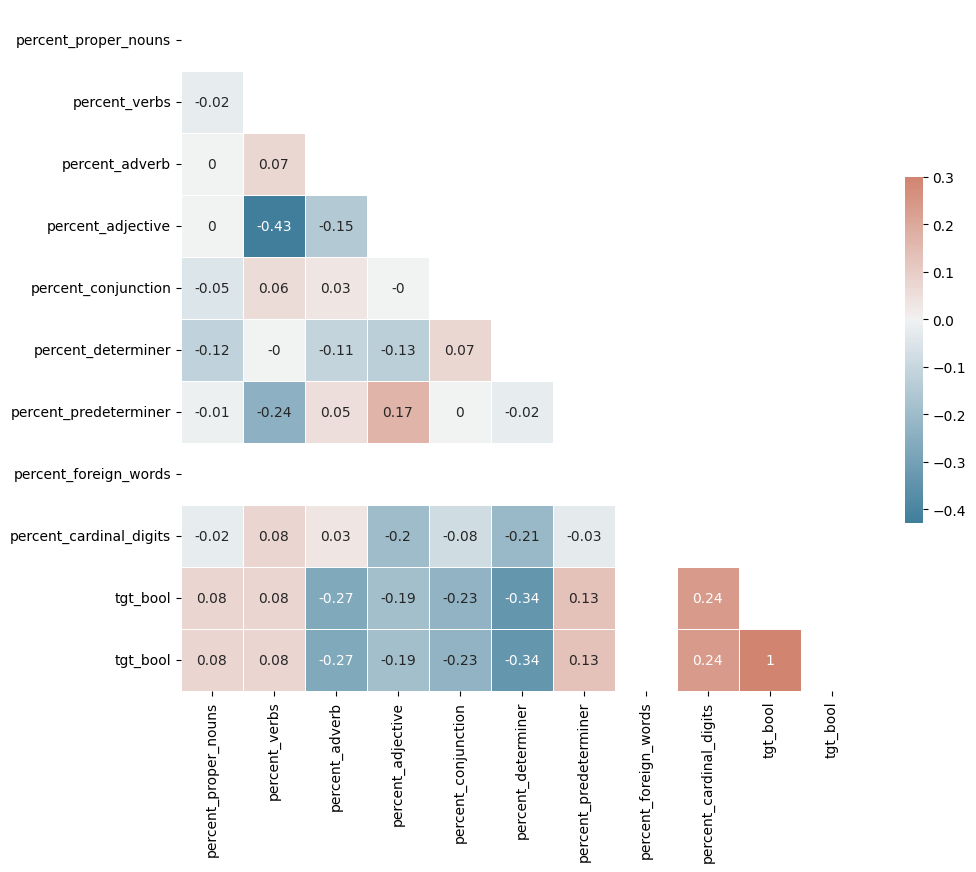

In [22]:
corr = df1[df1.columns.tolist()[-10:] + ['tgt_bool']].corr()
corr = np.round(corr, 2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

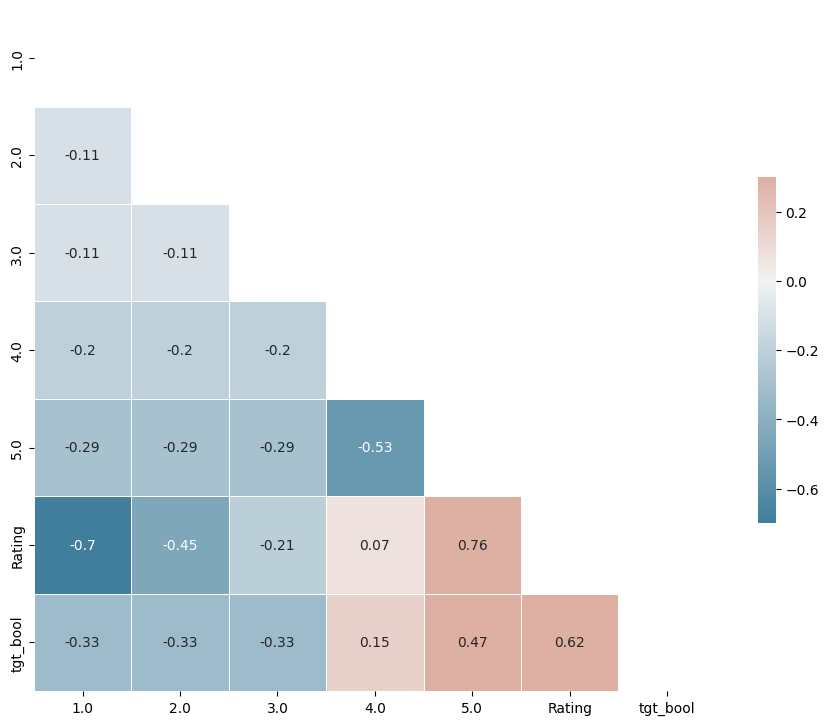

In [23]:
category = pd.get_dummies(df1['Rating'])
df2 = pd.concat([df1,category], axis = 1)
corr = df2[category.columns.tolist() + ['Rating','tgt_bool']].corr()
corr = np.round(corr, 2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [24]:
# sns.barplot(df, x = 'category', y = 'string_length', hue = 'label')
# plt.xticks(rotation=70)
# plt.tight_layout()

In [25]:
# sns.barplot(df, x = 'category', y = 'word_count', hue = 'label')
# plt.xticks(rotation=70)
# plt.tight_layout()

In [26]:
# sns.barplot(df, x = 'category', y = 'subjectivity', hue = 'label')
# plt.xticks(rotation=70)
# plt.tight_layout()

In [27]:
# sns.barplot(df, x = 'category', y = 'polarity', hue = 'label')
# plt.xticks(rotation=70)
# plt.tight_layout()